# Financial Data Sources

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

# Remote data access for pandas
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas_datareader import wb
#from pandas_datareader.data import DataReader

## Working with Excel (Multiple Sheets)

In [5]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('data/listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

print('Sheet Names:', exchanges)

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

Sheet Names: ['amex', 'nasdaq', 'nyse']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


In [6]:
listing_data

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.3000,0.000000e+00,NaN,NaN,NaN,nyse
3143,ZBK,Zions Bancorporation,28.8600,0.000000e+00,NaN,Finance,Major Banks,nyse
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014.0,Consumer Services,Restaurants,nyse
3145,ZTS,Zoetis Inc.,53.1000,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals,nyse


## `pandas-datareader`

https://pandas-datareader.readthedocs.io/en/latest/index.html#pandas-datareader

### IEX Cloud

In [7]:
import os

IEX_API_KEY = os.environ["IEX_API_KEY"]

In [25]:
start = date.today() - timedelta(2)

end = date.today()

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

df = web.DataReader(ticker, data_source, start, end)

df

,open,high,low,close,volume
date,,,,,
2020-12-22,131.61,134.405,129.65,131.88,169351825
2020-12-23,132.16,132.430,130.78,130.96,88223692


New

In [ ]:
# Plot close
df['close'].plot(title=ticker)

# Show the plot
plt.show()

### FRED

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8083 entries, 1990-01-01 to 2020-12-23
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOLDAMGBD228NLBM  7830 non-null   float64
dtypes: float64(1)
memory usage: 126.3 KB


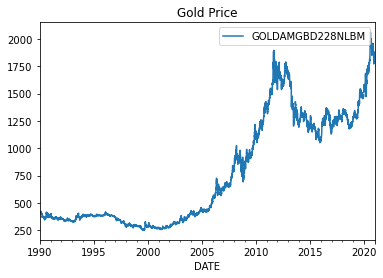

In [26]:
# Set start date
start = date(1990, 1, 1)

# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = web.DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

### World Bank

In [31]:
wb.search('gdp.*capita.*intern')

,id,name,unit,source,sourceNote,sourceOrganization,topics
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9269,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",,World Development Indicators,This indicator provides per capita values for ...,"b'International Comparison Program, World Bank...",Economy & Growth
9270,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9271,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [19]:
print(pdr.wb.country_codes)

['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BL', 'BM', 'BN', 'BO', 'BQ', 'BR', 'BS', 'BT', 'BV', 'BW', 'BY', 'BZ', 'CA', 'CC', 'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FK', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GS', 'GT', 'GU', 'GW', 'GY', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IO', 'IQ', 'IR', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MF', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NA', 'NC', 'NE', 'NF', 'NG', 'NI', 'NL', 'NO

In [50]:
#acquire the data from the World Bank’s servers
gdp = wb.download(indicator='NY.GDP.PCAP.PP.CD', country=['DE', 'TR'], start=2010, end=2020)

gdp

NY.GDP.PCAP.PP.CD
country year                   
Germany 2020                NaN
        2019       56278.249755
        2018       54652.978565
        2017       53254.691865
        2016       50574.576799
        2015       47622.572209
        2014       47011.551094
        2013       44993.892746
        2012       43359.614827
        2011       42541.531088
        2010       38978.743698
Turkey  2020                NaN
        2019       28134.449038
        2018       28395.480076
        2017       28141.197133
        2016       26511.387369
        2015       25760.283675
        2014       24089.411006
        2013       22437.795170
        2012       20771.950788
        2011       19798.951502
        2010       17553.909862

<AxesSubplot:xlabel='year'>

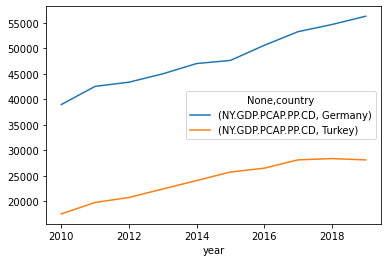

In [55]:
gdp.unstack(0).plot()